<a href="https://colab.research.google.com/github/HaroonSaleem/MNIST-Handwritten-Digit-Classification./blob/main/Copy_of_Deep_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT - 2

Develop a Convolutional Neural Network (CNN) From Scratch for MNIST Handwritten Digit Classification.

However, the dataset has already been effectively solved, it still serves as a valuable resource for learning and practicing the development, evaluation, and application of convolutional deep learning neural networks for image classification from the ground up. This includes building a reliable test framework for assessing model performance, exploring potential model enhancements, and learning how to save and later reload the model to make predictions on new data.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
mnist = mnist.load_data()

In [ ]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = mnist
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Define the CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model


In [ ]:
model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model and save the training history
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.7583 - loss: 0.7398 - val_accuracy: 0.9772 - val_loss: 0.0737
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 59ms/step - accuracy: 0.9655 - loss: 0.1226 - val_accuracy: 0.9829 - val_loss: 0.0561
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9786 - loss: 0.0784 - val_accuracy: 0.9849 - val_loss: 0.0518
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9814 - loss: 0.0672 - val_accuracy: 0.9872 - val_loss: 0.0438
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9850 - loss: 0.0511 - val_accuracy: 0.9893 - val_loss: 0.0418
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9878 - loss: 0.0412 - val_accuracy: 0.9889 - val_loss: 0.0400
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 88s 68ms/step - accuracy: 0.9890 - loss: 0.0362 - val_accuracy: 0.9880 - val_loss: 0.0467
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9911 - loss: 0.0318 - 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9895 - loss: 0.0384
Test accuracy: 0.9919999837875366


In [ ]:
# Save the model
model.save('mnist_cnn_model.h5')

In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')

In [ ]:
# Evaluate the loaded model
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(test_images, test_labels)
print(f'Loaded model test accuracy: {loaded_test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9895 - loss: 0.0384
Loaded model test accuracy: 0.9919999837875366


In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

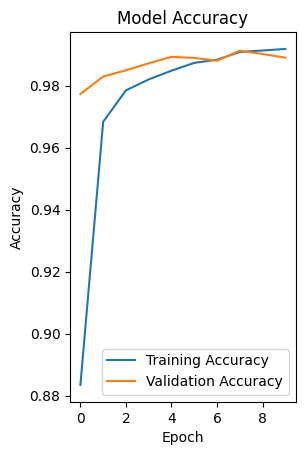

In [ ]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

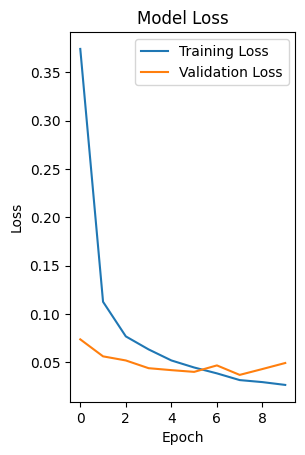

In [ ]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')